# **Генерация индивидуальных вариантов**

Скопировать файл "Кредит_1.csv" в папку \content.

Выполнить следующие фрагменты кода.

In [1]:
# установка библиотеки для генерации
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [2]:
from sdv.datasets.local import load_csvs
data=load_csvs(folder_name = '/content/')
from sdv.metadata import Metadata
metadata = Metadata.detect_from_dataframes(data)
from sdv.multi_table import HMASynthesizer
synthesizer = HMASynthesizer(metadata)
synthesizer.fit(data)

/usr/local/lib/python3.11/dist-packages/sdv/multi_table/base.py:101: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


Индивидуальный вариант соответствует номеру студента по списку в журнале посещаемости занятий.

Значение параметра `scale` установить в соответствие с индивидуальным вариантом.Величина параметра `scale` начинается со значения 1 для варианта 1 и увеличивается с шагом 0,1 для следующих вариантов:
- вариант 1: `scale = 1`;
- вариант 2: `scale = 1.1`;
- вариант 3: `scale = 1.2`;
- и т. д.

In [3]:
synthetic_data = synthesizer.sample(scale = 1.9)

In [4]:
import pandas as pd
df = synthetic_data['Кредит_1']
df.head()

,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита
0,sdv-pii-ezs21,Male,No,2,Graduate,No,4803,13.756265,65.0,360.0,1.0,Urban,N
1,sdv-pii-0zrmb,Male,No,0,Graduate,No,5159,33.713442,124.0,360.0,0.0,Urban,Y
2,sdv-pii-bkyl0,Female,No,0,Graduate,No,6026,0.001689,126.0,360.0,1.0,Urban,N
3,sdv-pii-29n9p,Male,Yes,0,Graduate,No,3963,101.007067,132.0,NaN,1.0,Semiurban,Y
4,sdv-pii-a819d,Male,Yes,0,Graduate,No,4984,822.773639,108.0,360.0,1.0,Semiurban,Y


# **Подготовка данных. Часть 1**

Вывести информацию и наборе данных.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID клиента          726 non-null    object 
 1   Пол                 713 non-null    object 
 2   Семейное положение  726 non-null    object 
 3   Иждивенцы           718 non-null    object 
 4   Образование         726 non-null    object 
 5   Самозанятость       678 non-null    object 
 6   Доход клиента       726 non-null    int64  
 7   Доход поручителя    726 non-null    float64
 8   Сумма кредита       726 non-null    float64
 9   Срок кредита        701 non-null    object 
 10  Кредитная история   663 non-null    float64
 11  Место жительства    726 non-null    object 
 12  Одобрение кредита   726 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 73.9+ KB


Определить наличие ошибочных записей в значениях признаков.

In [6]:
features = ['Иждивенцы', 'Срок кредита']
for feature in features:
  uniques = df[feature].unique()
  print('Признак:', '\n', 'Тип данных:', df[feature].dtype, '\n', feature, '\n', uniques, '\n', '--' * 40, '\n',)

Признак: 
 Тип данных: object 
 Иждивенцы 
 ['2' '0' '3+' '1' nan] 
 -------------------------------------------------------------------------------- 

Признак: 
 Тип данных: object 
 Срок кредита 
 ['360.0' nan '480.0' '180.0' '300#' '12.0' '120.0' '240.0' '84.0' '60.0'
 '36.0'] 
 -------------------------------------------------------------------------------- 



Преобразовать признаки, которые должны быть количественными в формат `int` или `float`.

In [7]:
for feature in features:
  df[feature] = df[feature].str.strip('+#')
for feature in features:
  uniques = df[feature].unique()
  print('Признак:', '\n', 'Тип данных:', df[feature].dtype, '\n', feature, '\n', uniques, '\n', '--' * 40, '\n',)

Признак: 
 Тип данных: object 
 Иждивенцы 
 ['2' '0' '3' '1' nan] 
 -------------------------------------------------------------------------------- 

Признак: 
 Тип данных: object 
 Срок кредита 
 ['360.0' nan '480.0' '180.0' '300' '12.0' '120.0' '240.0' '84.0' '60.0'
 '36.0'] 
 -------------------------------------------------------------------------------- 



In [8]:
df['Срок кредита'] = df['Срок кредита'].astype('float64')
df['Иждивенцы'] = df['Иждивенцы'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID клиента          726 non-null    object 
 1   Пол                 713 non-null    object 
 2   Семейное положение  726 non-null    object 
 3   Иждивенцы           718 non-null    float64
 4   Образование         726 non-null    object 
 5   Самозанятость       678 non-null    object 
 6   Доход клиента       726 non-null    int64  
 7   Доход поручителя    726 non-null    float64
 8   Сумма кредита       726 non-null    float64
 9   Срок кредита        701 non-null    float64
 10  Кредитная история   663 non-null    float64
 11  Место жительства    726 non-null    object 
 12  Одобрение кредита   726 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 73.9+ KB


Определить наличие и количество дубликатов.

In [9]:
df.duplicated().sum()

np.int64(0)

Обработать дублирующиеся записи.

In [10]:
# код

Определить наличие и количество пропущенных значений в признаках.

In [11]:
df.isna().sum()

,0
ID клиента,0
Пол,13
Семейное положение,0
Иждивенцы,8
Образование,0
Самозанятость,48
Доход клиента,0
Доход поручителя,0
Сумма кредита,0
Срок кредита,25


<Axes: >

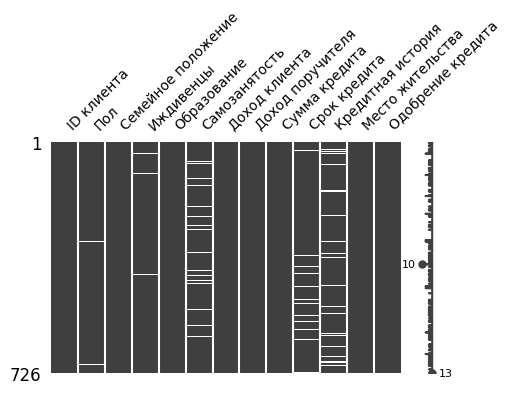

In [14]:
import missingno as msno
msno.matrix(df, figsize=(5, 3), fontsize=10)

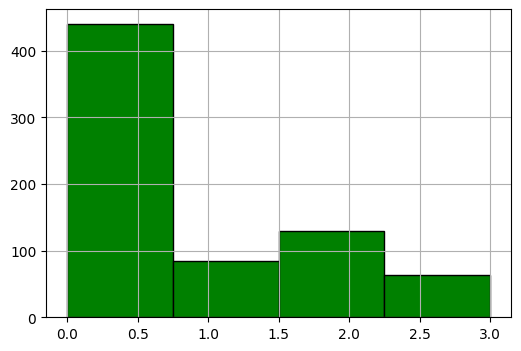

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.hist(df['Иждивенцы'], bins = 4, color = 'g', edgecolor = 'black')
plt.grid()

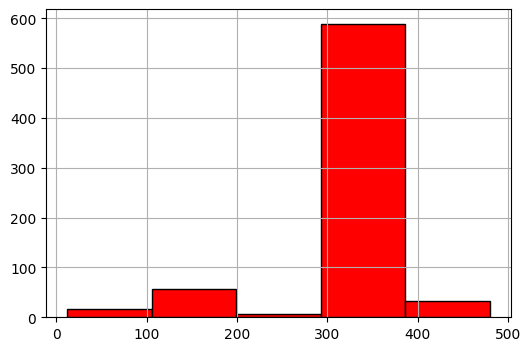

In [19]:
plt.figure(figsize = (6, 4))
plt.hist(df['Срок кредита'], bins = 5, color = 'r', edgecolor = 'black')
plt.grid()

Заменить пропущенные значения выбранной статистикой.

In [21]:
df['Пол'] = df['Пол'].fillna(df['Пол'].mode()[0])
df['Иждивенцы'] = df['Иждивенцы'].fillna(df['Иждивенцы'].mode()[0])
df['Самозанятость'] = df['Самозанятость'].fillna(df['Самозанятость'].mode()[0])
df['Срок кредита'] = df['Срок кредита'].fillna(df['Срок кредита'].mode()[0])
df['Кредитная история'] = df['Кредитная история'].fillna(df['Кредитная история'].mode()[0])

In [22]:
df['Иждивенцы'] = df['Иждивенцы'].astype('int64')

In [23]:
df.isna().sum()

,0
ID клиента,0
Пол,0
Семейное положение,0
Иждивенцы,0
Образование,0
Самозанятость,0
Доход клиента,0
Доход поручителя,0
Сумма кредита,0
Срок кредита,0


Определить наличие аномальных значений признаков, которые не соответствуют их физической природе.

In [24]:
df[df['Доход клиента'] < 0]

,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита
175,sdv-pii-9ih9t,Male,Yes,0,Graduate,No,-1410,3064.220358,35.0,360.0,1.0,Urban,Y
498,sdv-pii-7kaog,Female,Yes,2,Graduate,No,-549,7331.084803,28.0,360.0,1.0,Urban,Y


In [25]:
df[df['Доход поручителя'] < 0]

,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита


In [26]:
df[df['Срок кредита'] < 0]

,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита


In [27]:
df[df['Сумма кредита'] < 0]

,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита


Обработать выявленные аномальные значения признаков.

In [28]:
df = df[df['Доход клиента'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 725
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID клиента          724 non-null    object 
 1   Пол                 724 non-null    object 
 2   Семейное положение  724 non-null    object 
 3   Иждивенцы           724 non-null    int64  
 4   Образование         724 non-null    object 
 5   Самозанятость       724 non-null    object 
 6   Доход клиента       724 non-null    int64  
 7   Доход поручителя    724 non-null    float64
 8   Сумма кредита       724 non-null    float64
 9   Срок кредита        724 non-null    float64
 10  Кредитная история   724 non-null    float64
 11  Место жительства    724 non-null    object 
 12  Одобрение кредита   724 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 79.2+ KB


Определить наличие статистических выбросов с использованием выбранного метода.

In [29]:
df['Доход поручителя'].describe()

,Доход поручителя
count,724.000000
mean,1091.461570
std,2792.691776
min,0.000000
25%,0.159240
50%,26.012959
75%,549.182518
max,24841.395170


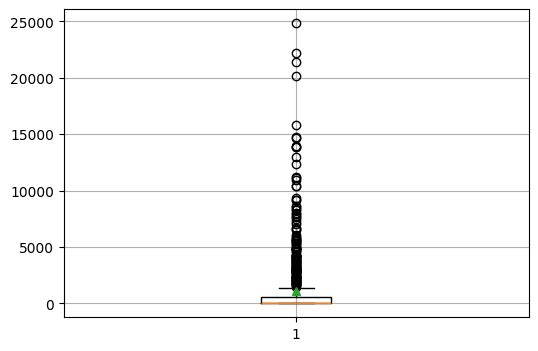

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.boxplot(df['Доход поручителя'],
            showmeans = True,
            whis = 1.5)
plt.grid()

In [31]:
q1 = df['Доход поручителя'].quantile(0.25)
q3 = df['Доход поручителя'].quantile(0.75)
iqr = q3 - q1
lower_bound_guar_inc = q1 - (1.5 * iqr)
upper_bound_guar_inc = q3 + (1.5 * iqr)
len(df[df['Доход поручителя'] < lower_bound_guar_inc]) or len(df[df['Доход поручителя'] > upper_bound_guar_inc])

127

In [32]:
df['Доход клиента'].describe()

,Доход клиента
count,724.000000
mean,3603.588398
std,1406.968078
min,403.000000
25%,2604.500000
50%,3506.000000
75%,4517.250000
max,7556.000000


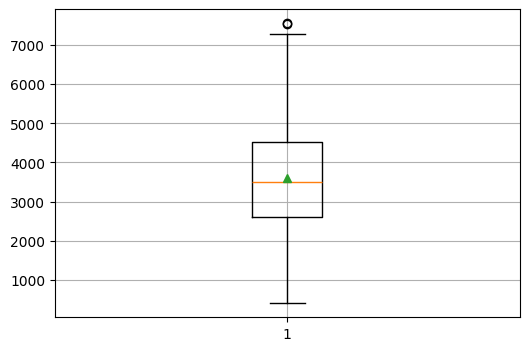

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.boxplot(df['Доход клиента'],
            showmeans = True,
            whis = 1.5)
plt.grid()

In [34]:
q1 = df['Доход клиента'].quantile(0.25)
q3 = df['Доход клиента'].quantile(0.75)
iqr = q3 - q1
lower_bound_client_inc = q1 - (1.5 * iqr)
upper_bound_client_inc = q3 + (1.5 * iqr)
len(df[df['Доход клиента'] < lower_bound_client_inc]) or len(df[df['Доход клиента'] > upper_bound_client_inc])

2

In [36]:
df['Сумма кредита'].describe()

,Сумма кредита
count,724.000000
mean,105.635359
std,27.457744
min,17.000000
25%,88.000000
50%,110.000000
75%,126.250000
max,150.000000


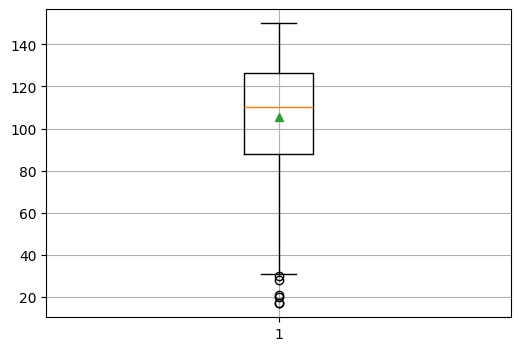

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.boxplot(df['Сумма кредита'],
            showmeans = True,
            whis = 1.5)
plt.grid()

In [38]:
q1 = df['Сумма кредита'].quantile(0.25)
q3 = df['Сумма кредита'].quantile(0.75)
iqr = q3 - q1
lower_bound_credit_sum = q1 - (1.5 * iqr)
upper_bound_credit_sum = q3 + (1.5 * iqr)
len(df[df['Сумма кредита'] < lower_bound_credit_sum]) or len(df[df['Сумма кредита'] > upper_bound_credit_sum])

6

In [39]:
df['Срок кредита'].describe()

,Срок кредита
count,724.000000
mean,341.850829
std,72.368198
min,12.000000
25%,360.000000
50%,360.000000
75%,360.000000
max,480.000000


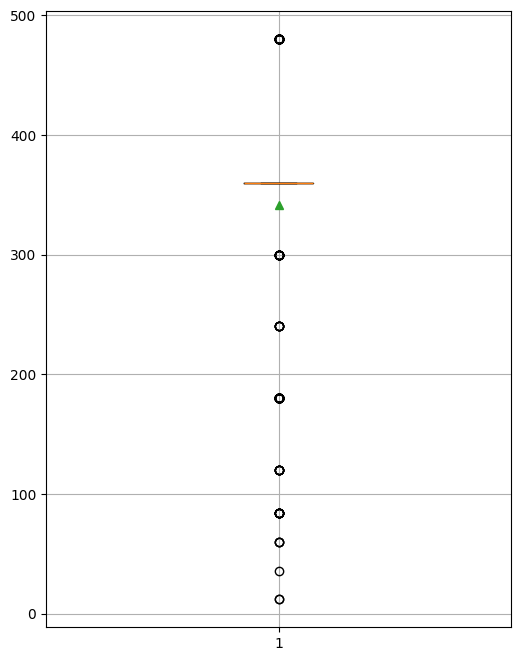

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 8))
plt.boxplot(df['Срок кредита'],
            showmeans = True,
            whis = 1.5)
plt.grid()

In [41]:
q1 = df['Срок кредита'].quantile(0.25)
q3 = df['Срок кредита'].quantile(0.75)
iqr = q3 - q1
lower_bound_credit_age = q1 - (1.5 * iqr)
upper_bound_credit_age = q3 + (1.5 * iqr)
len(df[df['Срок кредита'] < lower_bound_credit_age]) or len(df[df['Срок кредита'] > upper_bound_credit_age])

96

Обработать выявленные статистические выбросы.

In [42]:
df_clean = df.copy()
df_clean = df.loc[df['Доход клиента'] >= lower_bound_client_inc][df['Доход клиента'] <= upper_bound_client_inc]
df_clean = df.loc[df['Доход поручителя'] >= lower_bound_guar_inc][df['Доход поручителя'] <= upper_bound_guar_inc]
df_clean = df.loc[df['Сумма кредита'] >= lower_bound_credit_sum][df['Сумма кредита'] <= upper_bound_credit_sum]
df_clean = df.loc[df['Срок кредита'] >= lower_bound_credit_age][df['Срок кредита'] <= upper_bound_credit_age]
df_clean

<ipython-input-42-21721a6cd28f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df.loc[df['Сумма кредита'] >= lower_bound_credit_sum][df['Сумма кредита'] <= upper_bound_credit_sum]
<ipython-input-42-21721a6cd28f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df.loc[df['Срок кредита'] >= lower_bound_credit_age][df['Срок кредита'] <= upper_bound_credit_age]


,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита
0,sdv-pii-ezs21,Male,No,2,Graduate,No,4803,13.756265,65.0,360.0,1.0,Urban,N
1,sdv-pii-0zrmb,Male,No,0,Graduate,No,5159,33.713442,124.0,360.0,0.0,Urban,Y
2,sdv-pii-bkyl0,Female,No,0,Graduate,No,6026,0.001689,126.0,360.0,1.0,Urban,N
3,sdv-pii-29n9p,Male,Yes,0,Graduate,No,3963,101.007067,132.0,360.0,1.0,Semiurban,Y
4,sdv-pii-a819d,Male,Yes,0,Graduate,No,4984,822.773639,108.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,sdv-pii-ci19w,Male,No,2,Graduate,No,2155,3013.658093,99.0,360.0,1.0,Urban,N
722,sdv-pii-7nunv,Male,Yes,2,Graduate,No,5254,0.021325,118.0,360.0,1.0,Semiurban,Y
723,sdv-pii-0ukd0,Male,Yes,0,Graduate,No,4241,0.037900,106.0,360.0,1.0,Semiurban,Y
724,sdv-pii-mo753,Male,Yes,0,Graduate,Yes,1067,9165.531369,94.0,360.0,1.0,Semiurban,Y


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 0 to 725
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID клиента          595 non-null    object 
 1   Пол                 595 non-null    object 
 2   Семейное положение  595 non-null    object 
 3   Иждивенцы           595 non-null    int64  
 4   Образование         595 non-null    object 
 5   Самозанятость       595 non-null    object 
 6   Доход клиента       595 non-null    int64  
 7   Доход поручителя    595 non-null    float64
 8   Сумма кредита       595 non-null    float64
 9   Срок кредита        595 non-null    float64
 10  Кредитная история   595 non-null    float64
 11  Место жительства    595 non-null    object 
 12  Одобрение кредита   595 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 65.1+ KB
